In [17]:
import os
import tensorflow as tf

In [18]:
input_img_size = (128,128)
input_shape = (128,128,3)

In [19]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [27]:
train_gen = tf_generator.flow_from_directory(
    os.getcwd()+"/cats_and_dogs_filtered/train",
    target_size=input_img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

test_gen = tf_generator.flow_from_directory(
    os.getcwd()+"/cats_and_dogs_filtered/test",
    target_size=input_img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)


Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


[1. 0.]


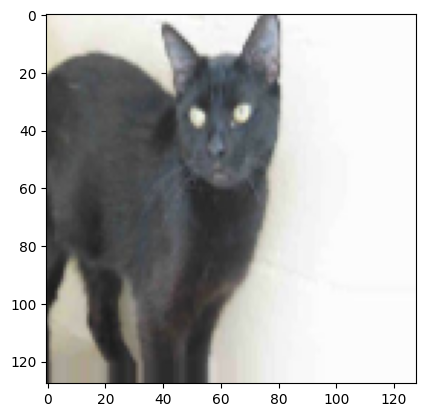

In [28]:
import matplotlib.pyplot as plt

test_label = None
test_img = None
for img,label in train_gen:
    test_img = img
    test_label = label
    break

print(test_label[0])
plt.imshow(test_img[0])

In [30]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    Conv2D(32,(3,3),activation="relu"),
    
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(2,activation='softmax')
    
])



In [31]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(0.001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,624,994 (105.38 MB)

 Trainable params: 27,624,994 (105.38 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(train_gen,validation_data=test_gen,epochs=20,verbose=1)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6108 - loss: 0.6587 - val_accuracy: 0.6653 - val_loss: 0.6163
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.6030 - loss: 0.6612 - val_accuracy: 0.5645 - val_loss: 0.6707
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.6025 - loss: 0.6844 - val_accuracy: 0.6532 - val_loss: 0.6288
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.6123 - loss: 0.6589 - val_accuracy: 0.6250 - val_loss: 0.6362
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.6281 - loss: 0.6807 - val_accuracy: 0.6331 - val_loss: 0.6481
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.6001 - loss: 0.6800 - val_accuracy: 0.4960 - val_loss: 0.8172
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5560 - loss: 0.7568 - val_accuracy: 0.6048 - val_loss: 0.6736
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5966 - loss: 0.7479 - val_accuracy: 0.5282 - v

In [34]:
import json
class_names = train_gen.class_indices
print("class_names : ",class_names)
class_path = "sample_class_names.json"
with open(class_path,"w") as f:
    json.dump(class_names,f)

class_names :  {'cats': 0, 'dogs': 1}


In [35]:
## Save both architecture and weights

model_file = "my_tf_model.h5"
model.save(model_file)




In [36]:
### load from saved h5 file
from tensorflow.keras.models import load_model
model_file = "my_tf_model.h5"
new_model = load_model(model_file)
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,624,996 (105.38 MB)

 Trainable params: 27,624,994 (105.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Saving Weights and Architecture Separately

In [37]:
weight_only_path = "weight_and_model/tf_model_weight_only.weights.h5"

archi_only_path = "weight_and_model/tf_model_architecture.json"

with open(archi_only_path,'w') as f:
    f.write(new_model.to_json())


new_model.save_weights(weight_only_path)

In [38]:
# loading time
weight_only_path = "weight_and_model/tf_model_weight_only.weights.h5"

archi_only_path = "weight_and_model/tf_model_architecture.json"

from tensorflow.keras.models import model_from_json
with open(archi_only_path,'r') as f:
    model_json = f.read()
new_model_2 = model_from_json(model_json)

#set weights
new_model_2.load_weights(weight_only_path)
new_model_2.summary()




/Users/tharhtet/.local/share/virtualenvs/test2-jnp9vXya/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,874,984 (316.14 MB)

 Trainable params: 27,624,994 (105.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,249,990 (210.76 MB)

(32, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0.6236877  0.37631235]
0


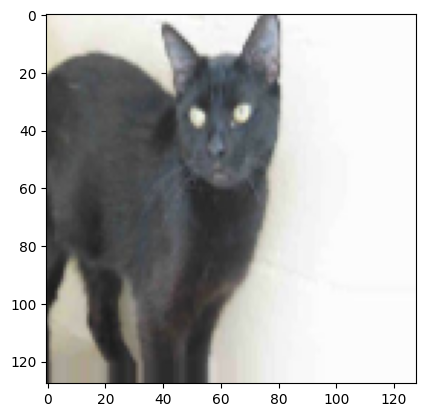

In [42]:
# test
input_img_size = (128,128)
input_shape = (128,128,3)
import cv2
import matplotlib.pyplot as plt
import numpy as np

#img_path = "/Users/tharhtet/Documents/test2/fruits/Kiwi/0_100.jpg"
#img = cv2.imread(img_path)
#img = cv2.resize(img, input_img_size)
print(test_img.shape)
_pred = new_model_2.predict(test_img)[0]
print(_pred)
print(np.argmax(_pred))
plt.imshow(test_img[0])